In [1]:
'''
alpha matting is used to mask portion of image (i.e. alpha channel)
the alpha channel plays a crucial role in defining transparency and blending. It's like an additional layer of information alongside the red, green, and blue (RGB) channels that determine the actual colors. Here's what the alpha channel does:

1. Transparency control:
The alpha channel values range from 0 to 255 (or 0.0 to 1.0 depending on the format)
A value of 0 indicates complete transparency, meaning the corresponding pixel is invisible
A value of 255 (or 1.0) represents full opacity, making the pixel fully visible.
Values between 0 and 255 (or 0.0 and 1.0) define varying degrees of transparency, allowing pixels to gradually fade from invisible to fully visible

alpha channel enables layering and blending of images seamlessly
I = alpha*F + (1 - alpha)*B
'''

"\nalpha matting is used to mask portion of image (i.e. alpha channel)\nthe alpha channel plays a crucial role in defining transparency and blending. It's like an additional layer of information alongside the red, green, and blue (RGB) channels that determine the actual colors. Here's what the alpha channel does:\n\n1. Transparency control:\nThe alpha channel values range from 0 to 255 (or 0.0 to 1.0 depending on the format)\nA value of 0 indicates complete transparency, meaning the corresponding pixel is invisible\nA value of 255 (or 1.0) represents full opacity, making the pixel fully visible.\nValues between 0 and 255 (or 0.0 and 1.0) define varying degrees of transparency, allowing pixels to gradually fade from invisible to fully visible\n\nalpha channel enables layering and blending of images seamlessly\nI = alpha*F + (1 - alpha)*B\n"

In [2]:
'''
Brightness and contrast adjustments : multiplication and addition with a constant:
g(x)=af(x)+β
The parameters a>0 and β are often called the gain and bias parameters; 
sometimes these parameters are said to control contrast and brightness respectively.

It can occur that playing with the β bias will improve the brightness but in the same time 
the image will appear with a slight veil as the contrast will be reduced. The 'a' gain can be used to diminue 
this effect but due to the saturation, we will lose some details in the original bright regions.

'''

"\nBrightness and contrast adjustments : multiplication and addition with a constant:\ng(x)=af(x)+β\nThe parameters a>0 and β are often called the gain and bias parameters; \nsometimes these parameters are said to control contrast and brightness respectively.\n\nIt can occur that playing with the β bias will improve the brightness but in the same time \nthe image will appear with a slight veil as the contrast will be reduced. The 'a' gain can be used to diminue \nthis effect but due to the saturation, we will lose some details in the original bright regions.\n\n"

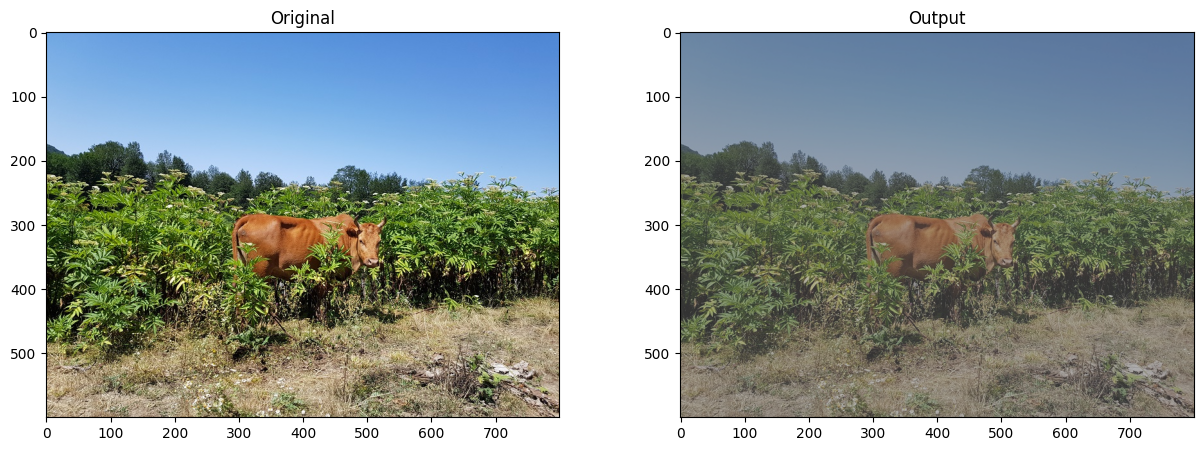

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("images/input.jpg")

new_image = np.zeros(image.shape, image.dtype)

alpha = float(input('* Enter the alpha value [0.1-3.0]: '))
beta = int(input('* Enter the beta value [0-100]: '))

new_image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

            
plt.figure(figsize=[15,5])
plt.subplot(121);plt.imshow(image[...,::-1]);plt.title("Original")
plt.subplot(122);plt.imshow(new_image[...,::-1]);plt.title("Output")

In [5]:
'''
Gamma correction can be used to correct the brightness of an image by using a 
non linear transformation between the input values and the mapped output values:
----------
O=pow((I/255), y)x255
As this relation is non linear, the effect will not be the same for all the pixels and will depend to their original value.
When y<1, dark regions will be brighter and the histogram will be shifted to the right whereas it will be the opposite with y>1.
'''

'\nGamma correction can be used to correct the brightness of an image by using a \nnon linear transformation between the input values and the mapped output values:\n\nO=pow((I/255), y)x255\nAs this relation is non linear, the effect will not be the same for all the pixels and will depend to their original value.\nWhen y<1, dark regions will be brighter and the histogram will be shifted to the right whereas it will be the opposite with y>1.\n'

Text(0.5, 1.0, 'Output')

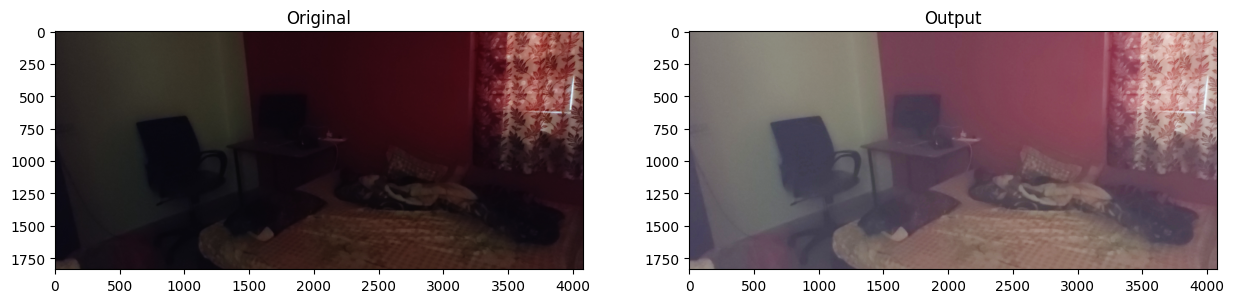

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

gamma = 0.4

#img_original = cv2.imread("images/room-light.jpg")
img_original = cv2.imread("images/my_testImage.jpg")
lookUpTable = np.empty((1,256), np.uint8)

for i in range(256):
    lookUpTable[0,i] = np.clip(pow(i / 255.0, gamma) * 255.0, 0, 255)
out = cv2.LUT(img_original, lookUpTable)


plt.figure(figsize=[15,5])
plt.subplot(121); plt.imshow(img_original[...,::-1]); plt.title("Original")
plt.subplot(122); plt.imshow(out[...,::-1]); plt.title("Output")